In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Ads_CTR_Optimisation.csv')
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Visualisation

In [4]:
# Visualising the results
def visualisation(ads_selected):
    plt.hist(ads_selected)
    plt.title('Histogram of ads selections')
    plt.xlabel('Ads')
    plt.ylabel('Number of times each ad was selected')
    plt.show()

## Random selection

In [5]:
# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected_rand = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected_rand.append(ad)
    reward = df.values[n, ad]
    total_reward = total_reward + reward
total_reward

1223

In [12]:
#Implementing UCB
# Implementing UCB
import math
N=10000
d=10
number_of_selections=[0]*d
sum_of_rewards=[0]*d
total_reward=0
ads_selected_ucb=[]
for n in range(0,N):
    ad=0
    max_upper_bound=0
    for i in range(0,d):
        if(number_of_selections[i]>0):
            avg_reward=sum_of_rewards[i]/number_of_selections[i]
            delta_i=math.sqrt(1.5*math.log(n+1)/number_of_selections[i])
            upper_bound=avg_reward+delta_i
        else:
            upper_bound=1e400
        if(upper_bound>max_upper_bound):
            max_upper_bound=upper_bound
            ad=i;
            
    ads_selected_ucb.append(ad)
    number_of_selections[ad]+=1
    reward=df.values[n,ad]
    sum_of_rewards[ad]+=reward
    total_reward+=reward
    

total_reward

2178

In [21]:
# Implementing Thompson Sampling
import random
N=10000
d=10
no_of_rewards_1=[0]*d
no_of_rewards_0=[0]*d
total_reward=0
ads_selected_tsampling=[]
for n in range(0,N):
    ad=0
    max_random=0
    for i in range(0,d):
        random_beta=random.betavariate(no_of_rewards_1[i]+1,no_of_rewards_0[i]+1)
        if(random_beta>max_random):
            max_random=random_beta
            ad=i;
            
    ads_selected_tsampling.append(ad)
    reward=df.values[n,ad]
    if(reward==1):
        no_of_rewards_1[ad]+=1
    else:
        no_of_rewards_0[ad]+=1
        
    total_reward+=reward
    

total_reward

2608

## Random selection visualisation

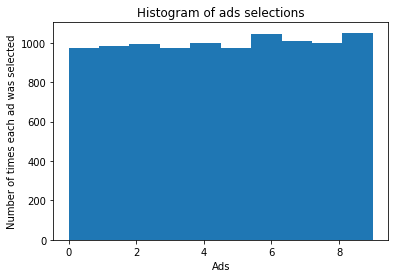

In [22]:
visualisation(ads_selected_rand)

## UCB Visualisation

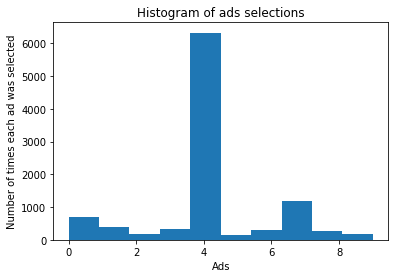

In [20]:
visualisation(ads_selected_ucb)

## Thompson sampling visualisation

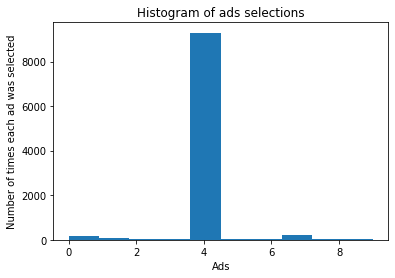

In [23]:
visualisation(ads_selected_tsampling)